In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, shutil

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
test_folder = '../data/test/'
train_folder = '../data/train/'
val_folder = '../data/val/'

In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_folder,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=(150, 150),
                                                        batch_size=8,
                                                        class_mode='binary')

Found 5219 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
5219/20

260.95

In [5]:
train, train_lables = next(train_generator)

In [6]:
train.shape

(20, 150, 150, 3)

In [7]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [8]:
fsm = model.fit_generator(train_generator, 
                              steps_per_epoch=50, 
                              epochs=10, 
                              validation_data=validation_generator, 
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
50/50 [==============================] - 14s 271ms/step - loss: 0.6752 - acc: 0.7220 - val_loss: 0.5355 - val_acc: 0.6875
Epoch 2/10
50/50 [==============================] - 13s 268ms/step - loss: 0.3993 - acc: 0.8300 - val_loss: 0.6241 - val_acc: 0.7500
Epoch 3/10
50/50 [==============================] - 13s 267ms/step - loss: 0.3359 - acc: 0.8690 - val_loss: 0.6538 - val_acc: 0.6875
Epoch 4/10
50/50 [==============================] - 14s 272ms/step - loss: 0.2796 - acc: 0.8829 - val_loss: 1.4923 - val_acc: 0.5000
Epoch 5/10
50/50 [==============================] - 13s 256ms/step - loss: 0.2282 - acc: 0.9110 - val_loss: 0.7923 - val_acc: 0.6250
Epoch 6/10
50/50 [==============================] - 14s 277ms/step - loss: 0.2103 - acc: 0.9189 - val_loss: 0.3291 - val_acc: 0.8750
Epoch 7/10
50/50 [==============================] - 13s 259ms/step - loss: 0.1821 - acc: 0.9250 - val_loss: 0.6421 - val_acc: 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 700928)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 700929    
Total params: 701,825
Trainable params: 701,825
Non-trainable params: 0
_________________________________________________________________


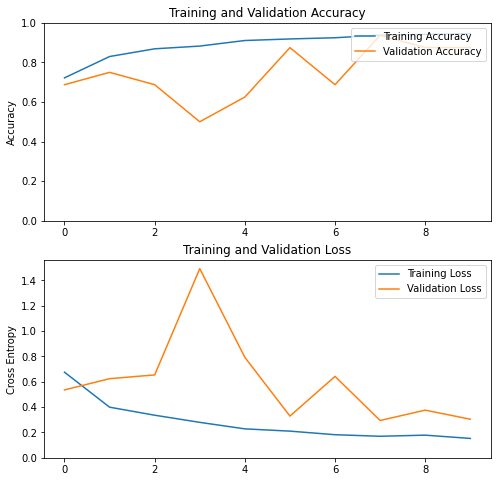

In [10]:
# Plot history
acc = fsm.history['acc']
val_acc = fsm.history['val_acc']

loss = fsm.history['loss']
val_loss = fsm.history['val_loss']

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([min(plt.ylim()), 1])
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('Cross Entropy')
ax[1].set_ylim([0,max(plt.ylim())])
ax[1].set_title('Training and Validation Loss')
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
fsm_1 = model.fit_generator(train_generator, 
                              steps_per_epoch=20, 
                              epochs=10, 
                              validation_data=validation_generator, 
                              )

Epoch 1/10
20/20 [==============================] - 6s 303ms/step - loss: 1.7130 - acc: 0.6450 - val_loss: 3.9277 - val_acc: 0.5000
Epoch 2/10
20/20 [==============================] - 5s 272ms/step - loss: 1.1640 - acc: 0.6525 - val_loss: 1.8615 - val_acc: 0.5000
Epoch 3/10
20/20 [==============================] - 5s 272ms/step - loss: 0.7118 - acc: 0.7450 - val_loss: 1.1808 - val_acc: 0.5625
Epoch 4/10
20/20 [==============================] - 5s 260ms/step - loss: 0.8071 - acc: 0.7725 - val_loss: 3.0107 - val_acc: 0.5000
Epoch 5/10
20/20 [==============================] - 5s 247ms/step - loss: 0.3919 - acc: 0.8475 - val_loss: 0.9312 - val_acc: 0.6250
Epoch 6/10
20/20 [==============================] - 5s 259ms/step - loss: 0.5549 - acc: 0.8225 - val_loss: 0.4491 - val_acc: 0.8125
Epoch 7/10
20/20 [==============================] - 5s 266ms/step - loss: 0.4294 - acc: 0.8250 - val_loss: 0.7582 - val_acc: 0.6875
Epoch 8/10
20/20 [==============================] - 5s 261ms/step - loss: 0.

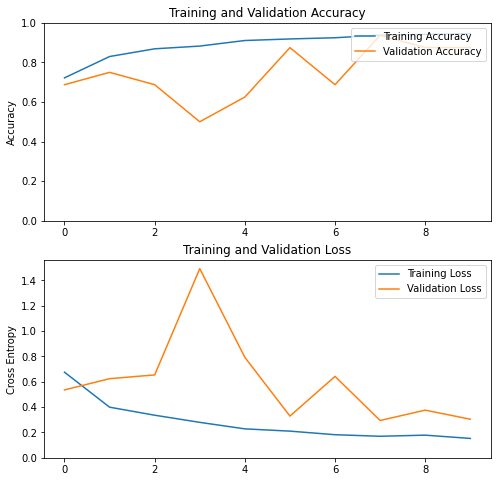

In [13]:
acc = fsm.history['acc']
val_acc = fsm.history['val_acc']

loss = fsm.history['loss']
val_loss = fsm.history['val_loss']

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([min(plt.ylim()), 1])
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('Cross Entropy')
ax[1].set_ylim([0,max(plt.ylim())])
ax[1].set_title('Training and Validation Loss')
plt.show()